In [1]:
import pandas as pd
import logging

# Log fayl manzili
log_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Log\ovo_ovr.log"

# Log sozlamalari
logging.basicConfig(
    filename=log_path,
    filemode='a',  # Append mode
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

try:
    logging.info("CSV fayl o'qilmoqda:...")
    df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Preprosessed\Preprosessedd.csv")
    logging.info(f"Fayl muvaffaqiyatli o'qildi. Satırlar soni: {len(df)} ustunlar soni: {len(df.columns)}")
except Exception as e:
    logging.error(f"CSV faylni o'qishda xatolik: {e}")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8493 entries, 0 to 8492
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          8493 non-null   int64  
 1   Video ID            8493 non-null   int64  
 2   Video Title         8493 non-null   int64  
 3   Channel             8493 non-null   int64  
 4   Published Date      8493 non-null   float64
 5   Views               8493 non-null   int64  
 6   Likes               8493 non-null   int64  
 7   Comments            8493 non-null   int64  
 8   Subscribers         8493 non-null   int64  
 9   Channel Views       8493 non-null   int64  
 10  Country             8493 non-null   int64  
 11  Region              8493 non-null   int64  
 12  CategoryID          8493 non-null   int64  
 13  CategoryName        8493 non-null   int64  
 14  Cluster             8493 non-null   int64  
 15  CategoryID_enc      8493 non-null   int64  
 16  Countr

In [3]:
x=df.drop('CategoryName',axis=1)
y=df['CategoryName']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

✅ Accuracy: 1.0000

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00       260
           3       1.00      1.00      1.00       109
           4       1.00      1.00      1.00       120
           5       1.00      1.00      1.00       194
           6       1.00      1.00      1.00       143
           7       1.00      1.00      1.00       143
           8       1.00      1.00      1.00       192
           9       1.00      1.00      1.00       140
          10       1.00      1.00      1.00       101

    accuracy                           1.00      1699
   macro avg       1.00      1.00      1.00      1699
weighted avg       1.00      1.00      1.00      1699



c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


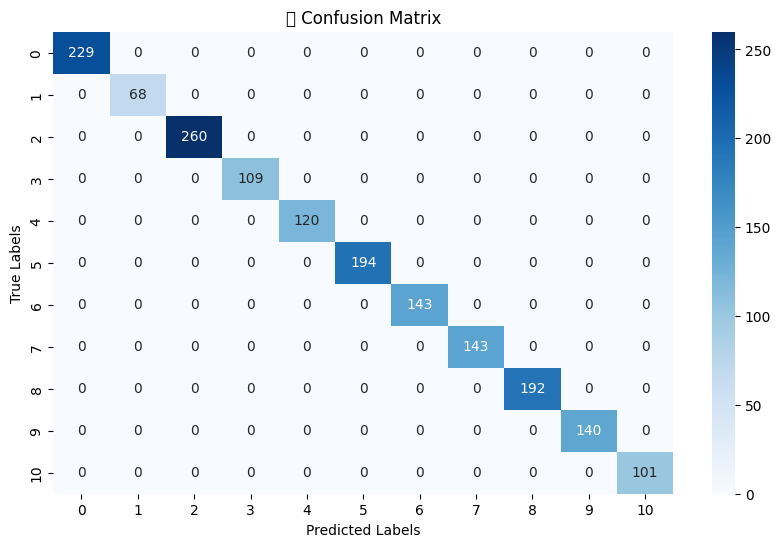

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 1. Ma'lumotlarni ajratish
X = df.select_dtypes(include=['int64', 'float64'])
y_raw = df["CategoryName"]

# 🔹 2. Label encoding (agar target matnli bo‘lsa)
le = LabelEncoder()
y = le.fit_transform(y_raw)

# 🔹 3. Train-test bo‘lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 4. One-vs-Rest model
ovr_model = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
ovr_model.fit(X_train, y_train)

# 🔹 5. Bashorat
y_pred = ovr_model.predict(X_test)

# 🔹 6. Baholash
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc:.4f}")

# 🔹 7. Klassifikatsiya hisobot
# Agar `le.classes_` raqam bo‘lsa — ularni string ga aylantiramiz:
target_names = [str(c) for c in le.classes_]

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# 🔹 8. Confusion matrix (vizual)
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("📉 Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# OvR + RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# ✅ To‘g‘ri variant
ovr_model = OneVsRestClassifier(RandomForestClassifier(
    n_estimators=100,      # Daraxtlar soni
    random_state=42
))

# Modelni o‘qitish
ovr_model.fit(X_train, y_train)

# Bashorat
y_pred_ovr = ovr_model.predict(X_test)

# Baholash
print("=== One-vs-Rest (OvR) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_ovr))

=== One-vs-Rest (OvR) ===
Accuracy: 1.0


In [17]:
y_pred_ovr[0]

np.int64(8)

# OvR + DecisionTreeClassifier

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# OvR modeli
ovr_model_dt = OneVsRestClassifier(DecisionTreeClassifier(
    criterion='gini',      # 'entropy' ham bo‘lishi mumkin
    max_depth=None,        # Daraxt chuqurligi (None = cheklanmagan)
    random_state=42
))

# Modelni o‘qitish
ovr_model_dt.fit(X_train, y_train)

# Bashorat
y_pred_dt = ovr_model_dt.predict(X_test)

# Baholash
print("=== One-vs-Rest (Decision Tree) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


=== One-vs-Rest (Decision Tree) ===
Accuracy: 1.0


# OvR + LogisticRegression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# OvR modeli
ovr_model_lr = OneVsRestClassifier(LogisticRegression(
    max_iter=1000,       # Iteratsiyalar soni (konvergentsiya uchun)
    solver='lbfgs',      # Yaxshi umumiy variant
    random_state=42
))

# Modelni o‘qitish
ovr_model_lr.fit(X_train, y_train)

# Bashorat
y_pred_lr = ovr_model_lr.predict(X_test)

# Baholash
print("=== One-vs-Rest (Logistic Regression) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/

=== One-vs-Rest (Logistic Regression) ===
Accuracy: 0.24529042386185243


# OvR + XGBClassifier

In [11]:
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# OvR modeli
ovr_model_xgb = OneVsRestClassifier(XGBClassifier(
    n_estimators=100,       # Daraxtlar soni
    learning_rate=0.1,      # O‘rganish tezligi
    max_depth=6,            # Daraxt chuqurligi
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'  # Ko‘p sinfli log-loss
))

# Modelni o‘qitish
ovr_model_xgb.fit(X_train, y_train)

# Bashorat
y_pred_xgb = ovr_model_xgb.predict(X_test)

# Baholash
print("=== One-vs-Rest (XGBoost) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:12:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:12:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:12:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:12:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\

=== One-vs-Rest (XGBoost) ===
Accuracy: 1.0


# OvO + RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score


ovo_model = OneVsOneClassifier(RandomForestClassifier(
    n_estimators=100,      # Daraxtlar soni
    random_state=42
))

ovo_model.fit(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)
print("=== One-vs-One (OvO) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_ovo))


=== One-vs-One (OvO) ===
Accuracy: 1.0


In [21]:
y_pred_ovo[0]

np.int64(8)

# OvO + DecisionTreeClassifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

# OvO modeli
ovo_model_dt = OneVsOneClassifier(DecisionTreeClassifier(
    criterion='gini',     # 'entropy' ham bo'lishi mumkin
    max_depth=None,       # Daraxt chuqurligi (None = cheklanmagan)
    random_state=42
))

# Modelni o‘qitish
ovo_model_dt.fit(X_train, y_train)

# Bashorat
y_pred_dt = ovo_model_dt.predict(X_test)

# Baholash
print("=== One-vs-One (Decision Tree) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


=== One-vs-One (Decision Tree) ===
Accuracy: 1.0


# OvO + LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

# OvO modeli
ovo_model_lr = OneVsOneClassifier(LogisticRegression(
    max_iter=1000,       # Iteratsiya soni (konvergentsiya uchun)
    solver='lbfgs',      # Yaxshi umumiy variant
    random_state=42
))

# Modelni o‘qitish
ovo_model_lr.fit(X_train, y_train)

# Bashorat
y_pred_lr = ovo_model_lr.predict(X_test)

# Baholash
print("=== One-vs-One (Logistic Regression) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/

=== One-vs-One (Logistic Regression) ===
Accuracy: 0.25902668759811615


# OvO + XGBClassifier

In [14]:
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

# OvO modeli
ovo_model_xgb = OneVsOneClassifier(XGBClassifier(
    n_estimators=100,       # Daraxtlar soni
    learning_rate=0.1,      # O‘rganish tezligi
    max_depth=6,            # Daraxt chuqurligi
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'  # Ko‘p sinfli log-loss
))

# Modelni o‘qitish
ovo_model_xgb.fit(X_train, y_train)

# Bashorat
y_pred_xgb = ovo_model_xgb.predict(X_test)

# Baholash
print("=== One-vs-One (XGBoost) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:12:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:12:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:12:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:12:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\

=== One-vs-One (XGBoost) ===
Accuracy: 1.0



🔹 Model: Random Forest (OvR)
✅ Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00       260
           3       1.00      1.00      1.00       109
           4       1.00      1.00      1.00       120
           5       1.00      1.00      1.00       194
           6       1.00      1.00      1.00       143
           7       1.00      1.00      1.00       143
           8       1.00      1.00      1.00       192
           9       1.00      1.00      1.00       140
          10       1.00      1.00      1.00       101

    accuracy                           1.00      1699
   macro avg       1.00      1.00      1.00      1699
weighted avg       1.00      1.00      1.00      1699


🔹 Model: Decision Tree (OvR)
✅ Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00 

c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/

✅ Accuracy: 0.2260
              precision    recall  f1-score   support

           0       0.34      0.55      0.42       229
           1       0.00      0.00      0.00        68
           2       0.19      0.45      0.27       260
           3       0.17      0.01      0.02       109
           4       0.00      0.00      0.00       120
           5       0.29      0.15      0.20       194
           6       0.19      0.10      0.13       143
           7       0.27      0.13      0.17       143
           8       0.20      0.32      0.25       192
           9       0.11      0.10      0.10       140
          10       0.20      0.01      0.02       101

    accuracy                           0.23      1699
   macro avg       0.18      0.17      0.14      1699
weighted avg       0.20      0.23      0.19      1699


🔹 Model: XGBoost (OvR)


c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:12:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:12:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:12:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:12:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\

✅ Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00       260
           3       1.00      1.00      1.00       109
           4       1.00      1.00      1.00       120
           5       1.00      1.00      1.00       194
           6       1.00      1.00      1.00       143
           7       1.00      1.00      1.00       143
           8       1.00      1.00      1.00       192
           9       1.00      1.00      1.00       140
          10       1.00      1.00      1.00       101

    accuracy                           1.00      1699
   macro avg       1.00      1.00      1.00      1699
weighted avg       1.00      1.00      1.00      1699


📊 One-vs-Rest natijalari:
                       Model  Accuracy
0        Random Forest (OvR)  1.000000
1        Decision Tree (OvR)  1.000000
3              XGBoost (

c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


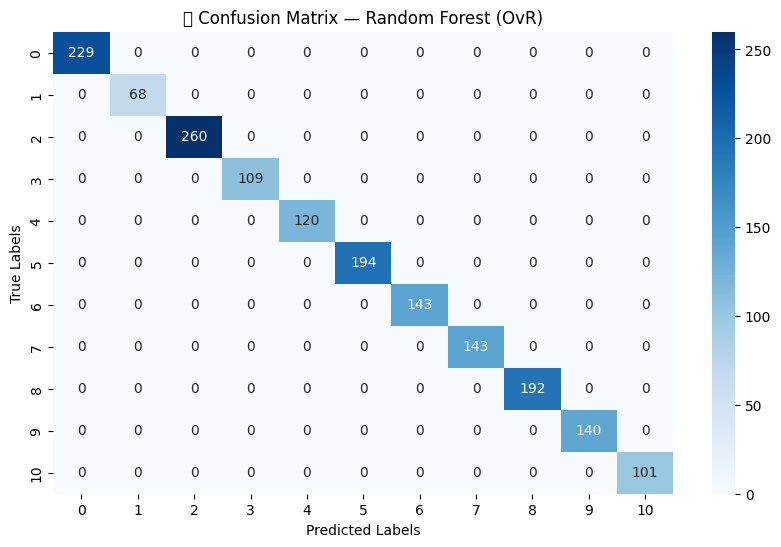

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier

# Klassifikatorlar
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# ==================================================
# 1️⃣ Ma'lumotlarni tayyorlash
# ==================================================
X = df.select_dtypes(include=['int64', 'float64'])
y_raw = df["CategoryName"]

# Label encoding
le = LabelEncoder()
y = le.fit_transform(y_raw)

# Train-Test bo‘lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==================================================
# 2️⃣ Modellar ro‘yxati (OvR uchun)
# ==================================================
models = {
    "Random Forest (OvR)": OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42)),
    "Decision Tree (OvR)": OneVsRestClassifier(DecisionTreeClassifier(random_state=42)),
    "Logistic Regression (OvR)": OneVsRestClassifier(LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)),
    "XGBoost (OvR)": OneVsRestClassifier(XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss'
    ))
}

# ==================================================
# 3️⃣ Har bir modelni o‘qitish va baholash
# ==================================================
results = []
reports = {}

for name, model in models.items():
    print(f"\n🔹 Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    
    # Classification report
    print(classification_report(y_test, y_pred, target_names=[str(c) for c in le.classes_]))
    
    # Natijalarni saqlash
    results.append({"Model": name, "Accuracy": acc})
    reports[name] = {
        "y_pred": y_pred,
        "matrix": confusion_matrix(y_test, y_pred)
    }

# ==================================================
# 4️⃣ Natijalarni jadval shaklida chiqarish
# ==================================================
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n📊 One-vs-Rest natijalari:")
print(results_df)

# ==================================================
# 5️⃣ Eng yaxshi model uchun Confusion Matrix
# ==================================================
best_model_name = results_df.iloc[0]["Model"]
best_matrix = reports[best_model_name]["matrix"]

plt.figure(figsize=(10, 6))
sns.heatmap(best_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f"📉 Confusion Matrix — {best_model_name}")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_8588\2042321613.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_8588\2042321613.py:40: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_8588\2042321613.py:48: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.savefig(save_path, dpi=300, bbox_inches='tight')
c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


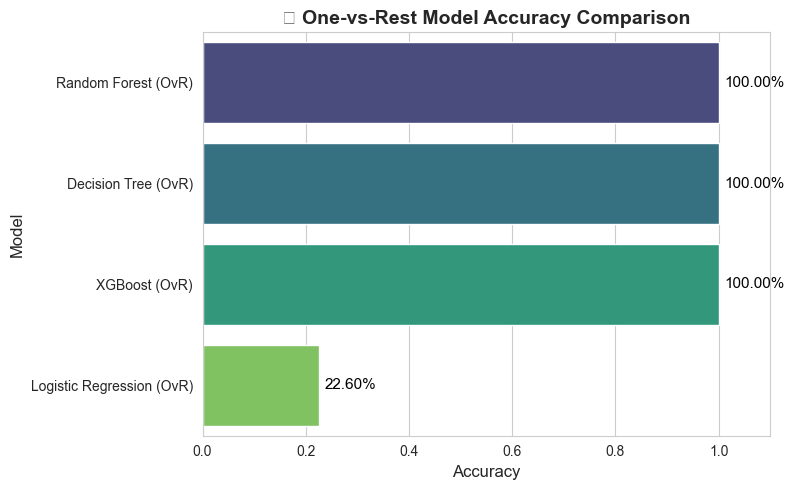

✅ Grafik saqlandi: C:\Users\Rasulbek907\Desktop\Project_MP\Results\OvR_Accuracy_Results.png


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# 📊 Natijalar jadvali
results_df = pd.DataFrame({
    "Model": [
        "Random Forest (OvR)",
        "Decision Tree (OvR)",
        "Logistic Regression (OvR)",
        "XGBoost (OvR)"
    ],
    "Accuracy": [1.0, 1.0, 0.226015, 1.0]
})

# 🔹 Tartiblash (eng yuqori accuracy bo‘yicha)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# 🎨 Grafik sozlamalari
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

ax = sns.barplot(
    x="Accuracy",
    y="Model",
    data=results_df,
    palette="viridis"
)

# 🔹 Har bir ustun ustiga foiz yozish
for i, (acc, model) in enumerate(zip(results_df["Accuracy"], results_df["Model"])):
    plt.text(acc + 0.01, i, f"{acc:.2%}", va="center", fontsize=11, color="black")

# 🔹 Dizayn
plt.title("📊 One-vs-Rest Model Accuracy Comparison", fontsize=14, weight='bold')
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.xlim(0, 1.1)
plt.tight_layout()

# 🔹 PNG fayl sifatida saqlash
save_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Results\OvR_Accuracy_Results.png"

# Agar papka mavjud bo‘lmasa, yaratadi
os.makedirs(os.path.dirname(save_path), exist_ok=True)

plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Grafik saqlandi: {save_path}")



🔹 Model: Random Forest (OvO)
✅ Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00       260
           3       1.00      1.00      1.00       109
           4       1.00      1.00      1.00       120
           5       1.00      1.00      1.00       194
           6       1.00      1.00      1.00       143
           7       1.00      1.00      1.00       143
           8       1.00      1.00      1.00       192
           9       1.00      1.00      1.00       140
          10       1.00      1.00      1.00       101

    accuracy                           1.00      1699
   macro avg       1.00      1.00      1.00      1699
weighted avg       1.00      1.00      1.00      1699


🔹 Model: Decision Tree (OvO)
✅ Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00 

c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/

✅ Accuracy: 0.2519
              precision    recall  f1-score   support

           0       0.38      0.37      0.38       229
           1       0.00      0.00      0.00        68
           2       0.24      0.67      0.35       260
           3       0.28      0.06      0.10       109
           4       0.00      0.00      0.00       120
           5       0.30      0.19      0.23       194
           6       0.00      0.00      0.00       143
           7       0.31      0.10      0.16       143
           8       0.22      0.46      0.30       192
           9       0.15      0.16      0.15       140
          10       0.00      0.00      0.00       101

    accuracy                           0.25      1699
   macro avg       0.17      0.18      0.15      1699
weighted avg       0.20      0.25      0.20      1699


🔹 Model: XGBoost (OvO)


c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

✅ Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00       260
           3       1.00      1.00      1.00       109
           4       1.00      1.00      1.00       120
           5       1.00      1.00      1.00       194
           6       1.00      1.00      1.00       143
           7       1.00      1.00      1.00       143
           8       1.00      1.00      1.00       192
           9       1.00      1.00      1.00       140
          10       1.00      1.00      1.00       101

    accuracy                           1.00      1699
   macro avg       1.00      1.00      1.00      1699
weighted avg       1.00      1.00      1.00      1699


📊 One-vs-One natijalari:
                       Model  Accuracy
0        Random Forest (OvO)  1.000000
1        Decision Tree (OvO)  1.000000
3              XGBoost (O

c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


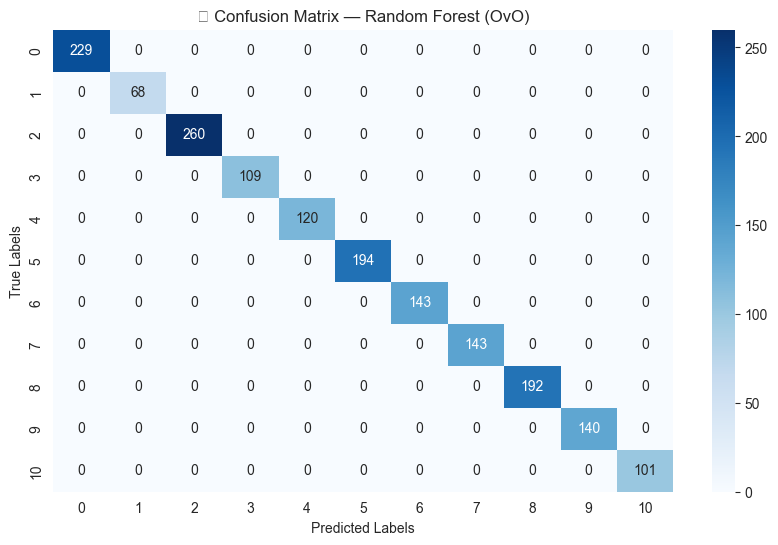

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.multiclass import OneVsOneClassifier

# Klassifikatorlar
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# ==================================================
# 1️⃣ Ma'lumotlarni tayyorlash
# ==================================================
X = df.select_dtypes(include=['int64', 'float64'])
y_raw = df["CategoryName"]

# Label encoding
le = LabelEncoder()
y = le.fit_transform(y_raw)

# Train-Test bo‘lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==================================================
# 2️⃣ Modellar ro‘yxati (OvO uchun)
# ==================================================
models = {
    "Random Forest (OvO)": OneVsOneClassifier(RandomForestClassifier(n_estimators=100, random_state=42)),
    "Decision Tree (OvO)": OneVsOneClassifier(DecisionTreeClassifier(random_state=42)),
    "Logistic Regression (OvO)": OneVsOneClassifier(LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)),
    "XGBoost (OvO)": OneVsOneClassifier(XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss'
    ))
}

# ==================================================
# 3️⃣ Har bir modelni o‘qitish va baholash
# ==================================================
results = []
reports = {}

for name, model in models.items():
    print(f"\n🔹 Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    
    # Classification report
    print(classification_report(y_test, y_pred, target_names=[str(c) for c in le.classes_]))
    
    # Natijalarni saqlash
    results.append({"Model": name, "Accuracy": acc})
    reports[name] = {
        "y_pred": y_pred,
        "matrix": confusion_matrix(y_test, y_pred)
    }

# ==================================================
# 4️⃣ Natijalarni jadval shaklida chiqarish
# ==================================================
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n📊 One-vs-One natijalari:")
print(results_df)

# ==================================================
# 5️⃣ Eng yaxshi model uchun Confusion Matrix
# ==================================================
best_model_name = results_df.iloc[0]["Model"]
best_matrix = reports[best_model_name]["matrix"]

plt.figure(figsize=(10, 6))
sns.heatmap(best_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f"📉 Confusion Matrix — {best_model_name}")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_8588\4170839484.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_8588\4170839484.py:40: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_8588\4170839484.py:48: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.savefig(save_path, dpi=300, bbox_inches='tight')
c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


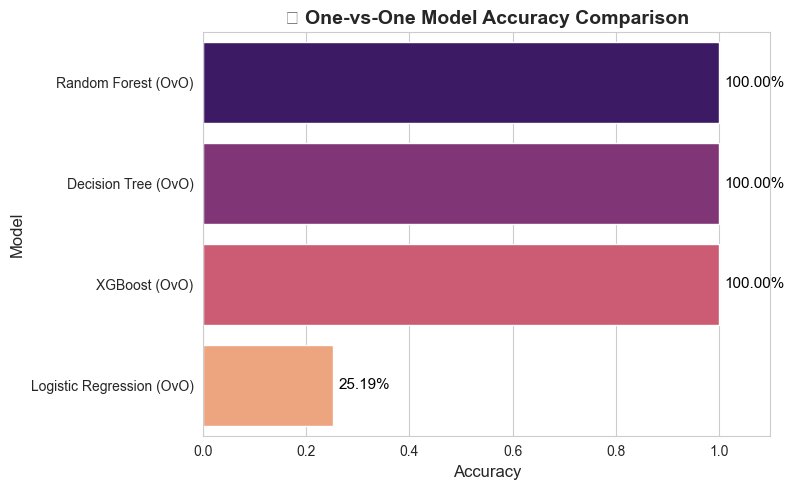

✅ Grafik saqlandi: C:\Users\Rasulbek907\Desktop\Project_MP\Results\OvO_Accuracy_Results.png


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# 📊 One-vs-One natijalar jadvali
results_df = pd.DataFrame({
    "Model": [
        "Random Forest (OvO)",
        "Decision Tree (OvO)",
        "Logistic Regression (OvO)",
        "XGBoost (OvO)"
    ],
    "Accuracy": [1.0, 1.0, 0.251913, 1.0]
})

# 🔹 Accuracy bo‘yicha tartiblash
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# 🎨 Grafik sozlamalari
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

ax = sns.barplot(
    x="Accuracy",
    y="Model",
    data=results_df,
    palette="magma"
)

# 🔹 Har bir ustun ustiga foiz yozish
for i, (acc, model) in enumerate(zip(results_df["Accuracy"], results_df["Model"])):
    plt.text(acc + 0.01, i, f"{acc:.2%}", va="center", fontsize=11, color="black")

# 🔹 Dizayn
plt.title("📊 One-vs-One Model Accuracy Comparison", fontsize=14, weight='bold')
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.xlim(0, 1.1)
plt.tight_layout()

# 🔹 PNG fayl sifatida saqlash
save_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Results\OvO_Accuracy_Results.png"

# Agar papka mavjud bo‘lmasa, yaratadi
os.makedirs(os.path.dirname(save_path), exist_ok=True)

plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Grafik saqlandi: {save_path}")
